# Assignment 4

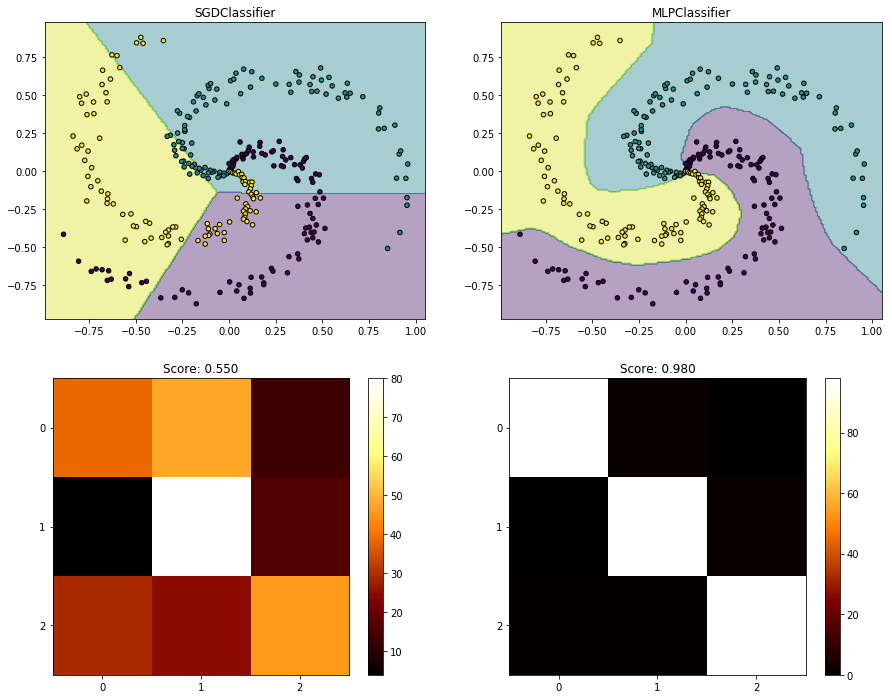

In [57]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Load data
data = np.genfromtxt('spiral.csv', delimiter=',', skip_header=1)
X = data[:, 0:2]
Y = data[:, 2]

# Setup/define
sdg = linear_model.SGDClassifier(loss='log', tol=0.001)
mlp = MLPClassifier(hidden_layer_sizes=72, max_iter=10000)

# Train
sdg.fit(X, Y)
mlp.fit(X, Y)

# Plot
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

fig, axarr = plt.subplots(2, 2, figsize=(15, 12))

for idx, clf, tt in zip([0, 1],
                        [sdg, mlp],
                        ['SGDClassifier', 'MLPClassifier']):
    # Decision regions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axarr[0, idx]
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    ax.set_title(tt)
    
    # Confusion matrices
    im = axarr[1, idx].imshow(confusion_matrix(Y, clf.predict(X)), interpolation='nearest', cmap=cm.afmhot)
    ax = axarr[1, idx]
    ax.set_title('Score: {0:.3f}'.format(clf.score(X,Y)))
    ax.set_xticks(np.arange(min(Y), max(Y)+1, 1.0))
    ax.set_yticks(np.arange(min(Y), max(Y)+1, 1.0))
    fig.colorbar(im, ax=ax)
  
plt.show()

## 